In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
import time  # pause plot
import csv

In [14]:
def solution_from_np(filename):
    lorenz_sol = np.genfromtxt(filename, delimiter=',')
    time = lorenz_sol[0, :]
    x = lorenz_sol[1, :]
    y = lorenz_sol[2, :]
    z = lorenz_sol[3, :]
    return time, x, y,z

In [15]:
# image details 
WIDTH, HEIGHT, DPI = 1000, 750, 100

In [16]:
lorenz_1 = np.genfromtxt('CSV/lorenz_init1.csv',delimiter=',')
lorenz_2 = np.genfromtxt('CSV/lorenz_init1.csv',delimiter=',')

In [21]:
t, x, y, z = solution_from_np('CSV/lorenz_init1.csv')
t, x_2, y_2, z_2 = solution_from_np('CSV/lorenz_init2.csv') 

/var/folders/9k/f9m5_ygx7yj100hlsz7zc0bc0000gp/T/ipykernel_60747/1706541810.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


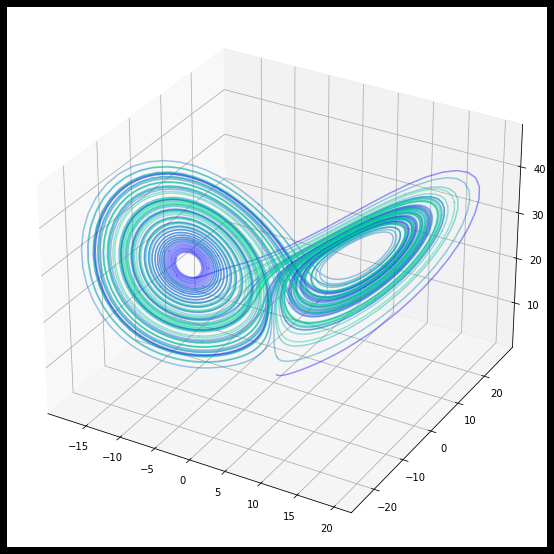

In [22]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
#ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
n=len(x)
s = 100
cmap = plt.cm.winter # winter
cmap_2 = plt.cm.autumn  #autumn
for i in range(0, n-s, s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)
    ax.set_title('')
    #ax.plot(x_2[i:i+s+1], y_2[i:i+s+1], z_2[i:i+s+1], color=cmap_2(i/n), alpha=0.4)
    #plt.pause(0.05)  # plot both curves incrementally
plt.show()

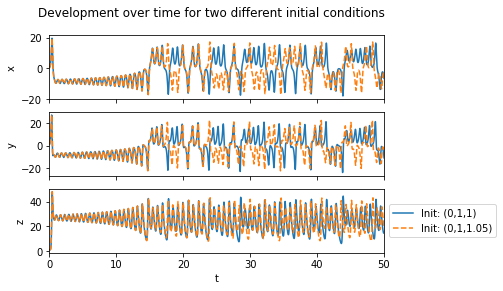

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)#, figsize=(15, 15))
fig.suptitle('Development over time for two different initial conditions')
ax1.plot(t, x)
ax1.plot(t, x_2, '--')
ax1.set_ylabel('x')
ax2.plot(t, y)
ax2.plot(t, y_2, '--')
ax2.set_ylabel('y')
ax3.plot(t, z, label= 'Init: (0,1,1)')
ax3.plot(t, z_2, '--', label='Init: (0,1,1.05)')
ax3.set_ylabel('z')
ax3.set_xlabel('t')
ax3.set_xlim(0, 50)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
